# Importing basic libraries

In [ ]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [ ]:
df = pd.read_excel('EDA Cars.xlsx')

### head of the dataset
### tail of the dataset
### info of the dataset
### shape of the dataset
### summary of the dataset

In [ ]:
df.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420.0
1,2,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
2,3,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420.0
3,4,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420.0
4,5,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0


In [ ]:
df.tail()

In [ ]:
df.info()

In [ ]:
df.shape

(303, 13)

In [ ]:
# Converting postel code into category
df['POSTAL CODE'] = pd.Categorical(df['POSTAL CODE'])

In [ ]:
df.describe()

,INDEX,INCOME,TRAVEL TIME,MILES CLOCKED,CAR AGE
count,303.000000,260.000000,262.000000,278.000000,283.000000
mean,139.640264,50025.162170,34.282098,13591.978417,6.265018
std,85.178422,41186.807914,14.910178,7167.328655,5.111218
min,1.000000,0.000000,5.000000,1500.000000,1.000000
25%,62.500000,20452.885023,24.449874,7900.000000,1.000000
50%,138.000000,44571.590870,33.564757,12065.000000,6.000000
75%,213.500000,66485.761387,43.907339,18240.000000,10.000000
max,289.000000,204667.589700,83.617643,38000.000000,20.000000


# Check for Duplicate records 

In [ ]:
dups = df.duplicated()
print("Number of duplicate rows = %d" % (dups.sum()))
df[dups]

Number of duplicate rows = 14


,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
69,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
70,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
71,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
72,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
73,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
74,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
75,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
76,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
77,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
78,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
dups = df.duplicated()
print("Number of duplicate rows = %d" % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE


In [ ]:
print(df.shape)

(289, 13)


In [ ]:
# Handling missing data
df.isnull().sum() / len(df)*100

INDEX              0.000000
INCOME            14.878893
MARITAL STATUS     9.688581
SEX                2.076125
EDUCATION         15.224913
JOB               15.916955
TRAVEL TIME       14.186851
USE               18.339100
MILES CLOCKED      8.650519
CAR TYPE           3.460208
CAR AGE            6.920415
CITY               2.076125
POSTAL CODE        1.038062
dtype: float64

In [ ]:
# we will use imputation method to handle it
df.head(5)

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420.0
1,2,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
2,3,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420.0
3,4,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420.0
4,5,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0


In [ ]:
# drop index
df = df.iloc[:,1:]

In [ ]:
df.head()

,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420.0
1,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
2,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420.0
3,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420.0
4,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0


In [ ]:
df1 = df.copy()

In [ ]:
df1.head()

,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420.0
1,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
2,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420.0
3,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420.0
4,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0


In [ ]:
# how much percent
df1.isnull().sum()/len(df1)*100

INCOME            14.878893
MARITAL STATUS     9.688581
SEX                2.076125
EDUCATION         15.224913
JOB               15.916955
TRAVEL TIME       14.186851
USE               18.339100
MILES CLOCKED      8.650519
CAR TYPE           3.460208
CAR AGE            6.920415
CITY               2.076125
POSTAL CODE        1.038062
dtype: float64

In [ ]:
df1.isnull().sum()[df1.isnull().sum()>0]

INCOME            43
MARITAL STATUS    28
SEX                6
EDUCATION         44
JOB               46
TRAVEL TIME       41
USE               53
MILES CLOCKED     25
CAR TYPE          10
CAR AGE           20
CITY               6
POSTAL CODE        3
dtype: int64

In [ ]:
df1[df1.isnull().sum()[df1.isnull().sum()>0].index].dtypes

INCOME             float64
MARITAL STATUS      object
SEX                 object
EDUCATION           object
JOB                 object
TRAVEL TIME        float64
USE                 object
MILES CLOCKED      float64
CAR TYPE            object
CAR AGE            float64
CITY                object
POSTAL CODE       category
dtype: object

In [ ]:
min(df1['INCOME'])

0.0

In [ ]:
df1['INCOME'] = df1['INCOME'].fillna(df1['INCOME'].median())

In [ ]:
median1 = df1['INCOME'].median()
median2 = df1['TRAVEL TIME'].median()
median3 = df1['MILES CLOCKED'].median()
mean1 = df1['CAR AGE'].mean()

df1['INCOME'].replace(np.nan, median1, inplace=True)
df1['TRAVEL TIME'].replace(np.nan, median2, inplace=True)
df1['MILES CLOCKED'].replace(np.nan, median3, inplace=True)
df1['CAR AGE'].replace(np.nan, mean1, inplace=True)

In [ ]:
max(df1['CAR AGE'])

20.0

MARITAL STATUS      object
SEX                 object
EDUCATION           object
JOB                 object
USE                 object
CAR TYPE            object
CITY                object
POSTAL CODE       category

In [ ]:
mode1 = df1['MARITAL STATUS'].mode().values[0]
mode2 = df1['SEX'].mode().values[0]
mode3 = df1['EDUCATION'].mode().values[0]
mode4 = df1['JOB'].mode().values[0]
mode5 = df1['USE'].mode().values[0]
mode6 = df1['CAR TYPE'].mode().values[0]
mode7 = df1['CITY'].mode().values[0]
mode8 = df1['POSTAL CODE'].mode().values[0]


df1['MARITAL STATUS'].replace(np.nan, mode1, inplace=True)
df1['SEX'].replace(np.nan, mode2, inplace=True)
df1['EDUCATION'].replace(np.nan, mode3, inplace=True)
df1['JOB'].replace(np.nan, mode4, inplace=True)
df1['USE'].replace(np.nan, mode5, inplace=True)
df1['CAR TYPE'].replace(np.nan, mode6, inplace=True)
df1['CITY'].replace(np.nan, mode7, inplace=True)
df1['POSTAL CODE'].replace(np.nan, mode8, inplace=True)

In [ ]:
df1.isnull().sum()

INCOME            0
MARITAL STATUS    0
SEX               0
EDUCATION         0
JOB               0
TRAVEL TIME       0
USE               0
MILES CLOCKED     0
CAR TYPE          0
CAR AGE           0
CITY              0
POSTAL CODE       0
dtype: int64

In [ ]:
df1['POSTAL CODE'].mode()

0    44412.0
Name: POSTAL CODE, dtype: category
Categories (11, float64): [11435.0, 12180.0, 42420.0, 44123.0, ..., 61701.0, 78207.0, 84057.0, 90049.0]

In [ ]:
df1['POSTAL CODE'] = df1['POSTAL CODE'].fillna(44412.0)

In [ ]:
for i in df1.columns:
    print("******************************", i, "******************************************")
    print()
    print(set(df1[i].tolist()))
    print()

****************************** INCOME ******************************************

{0.0, 62977.82416, 16896.56828, 33283.09242, 22020.81938, 23047.69123, 64013.81632, 19469.20268, 78866.44664, 3603.639121, 62486.2025, 86551.34847, 31773.10396, 21533.60807, 71197.08357, 71206.84229, 49703.42492, 57386.5819, 60972.96216, 93741.01937, 21042.41736, 55352.90711, 32317.31421, 200771.9243, 12871.11929, 20554.56402, 50251.7624, 1101.678305, 40528.15278, 61521.48327, 105554.3537, 17492.76645, 62036.46367, 91221.1218, 204372.9551, 92251.21306, 16988.72135, 22623.01291, 2656.766602, 102903.8717, 37991.26687, 53356.8697, 73325.74641, 33391.56753, 73842.01449, 189554.8586, 98421.21075, 152059.8036, 32381.4663, 50815.44531, 81024.32636, 47235.48762, 5252.670336, 116869.5012, 7302.3125, 58504.00815, 60049.83017, 38035.58347, 136343.7947, 51869.71691, 40094.81041, 158.223551, 17566.51355, 44705.21281, 69793.55832, 58530.20573, 111268.3117, 22181.48424, 43173.63322, 75431.95723, 32936.11043, 28326.29482

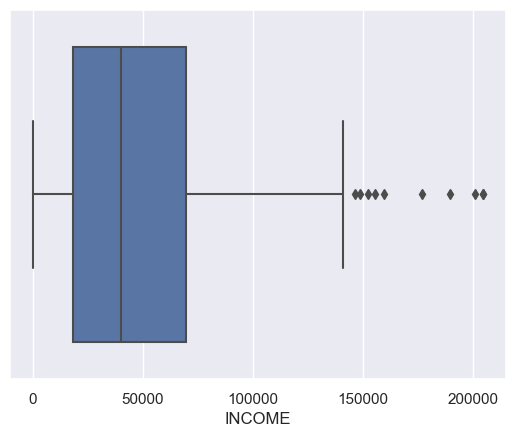

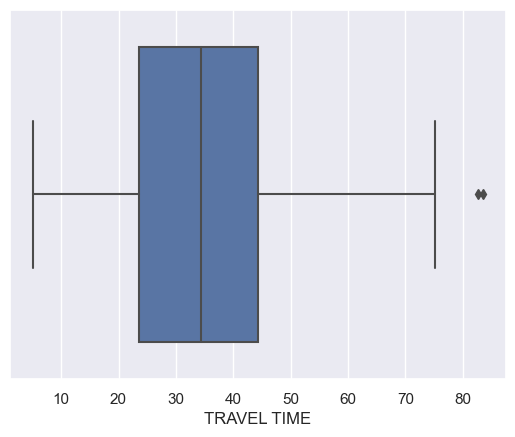

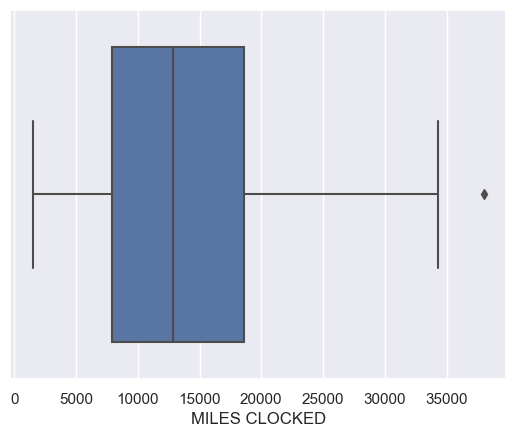

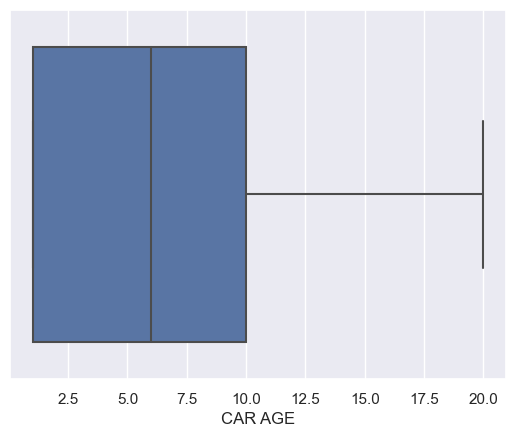

In [ ]:
def boxplots(col):
    sns.boxplot(df1[col])
    plt.show()
    
for i in list(df1.select_dtypes(exclude=['object','category']).columns)[0:]:
    boxplots(i)

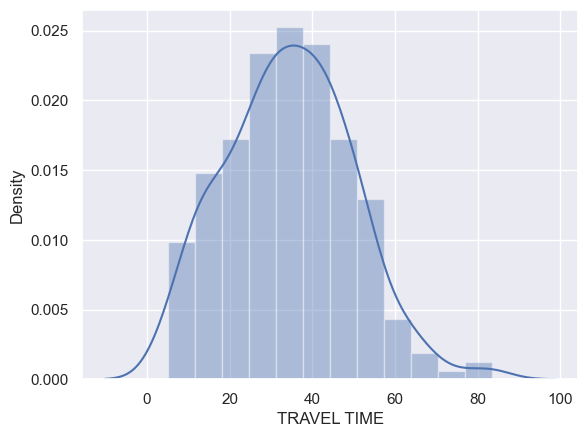

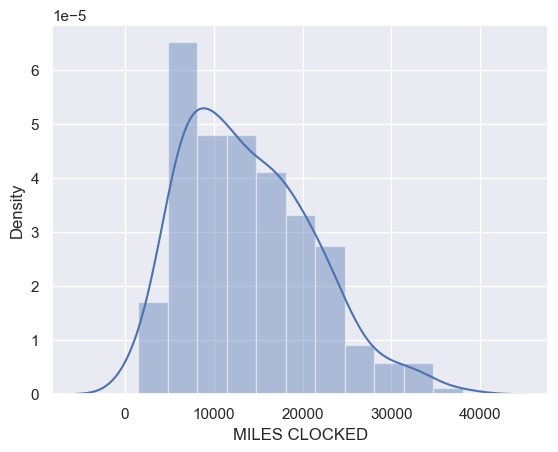

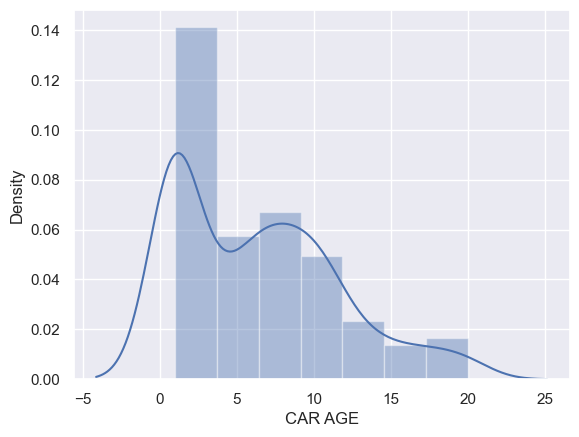

In [ ]:
def distplots(col):
    sns.distplot(df1[col])
    plt.show()
    
for i in list(df1.select_dtypes(exclude=['object','category']).columns)[1:]:
    distplots(i)

# outlier

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return lower_range, upper_range

In [ ]:
df1.columns

Index(['INCOME', 'MARITAL STATUS', 'SEX', 'EDUCATION', 'JOB', 'TRAVEL TIME',
       'USE', 'MILES CLOCKED', 'CAR TYPE', 'CAR AGE', 'CITY', 'POSTAL CODE'],
      dtype='object')

In [ ]:
lrincome, upincome = remove_outlier(df1['INCOME'])
df1['INCOME'] = np.where(df1['INCOME']>upincome, upincome, df1['INCOME'])
df1['INCOME'] = np.where(df1['INCOME']< lrincome, lrincome, df1['INCOME'])

lrtravel, uptravel = remove_outlier(df1['TRAVEL TIME'])
df1['TRAVEL TIME'] = np.where(df1['TRAVEL TIME']>uptravel, uptravel, df1['TRAVEL TIME'])
df1['TRAVEL TIME'] = np.where(df1['TRAVEL TIME']< lrtravel, lrtravel, df1['TRAVEL TIME'])

lrmiles, upmiles = remove_outlier(df1['MILES CLOCKED'])
df1['MILES CLOCKED'] = np.where(df1['MILES CLOCKED']>upmiles, upmiles, df1['MILES CLOCKED'])
df1['MILES CLOCKED'] = np.where(df1['MILES CLOCKED']< lrmiles, lrmiles, df1['MILES CLOCKED'])

<AxesSubplot:>

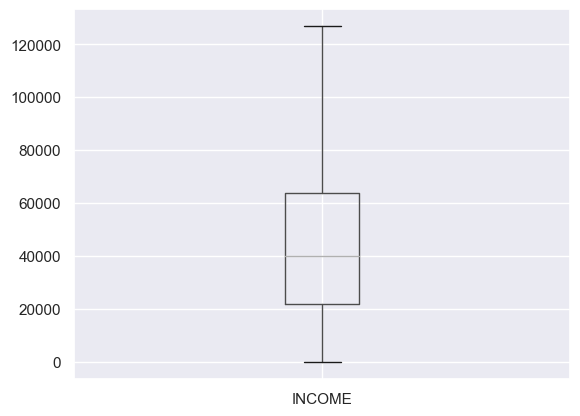

In [ ]:
df1.boxplot(column=['INCOME'])

<AxesSubplot:>

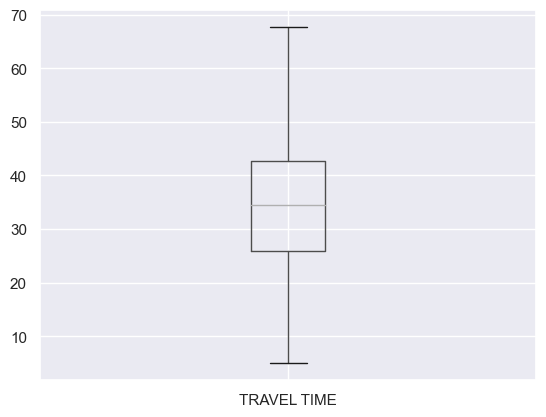

In [ ]:
df1.boxplot(column=['TRAVEL TIME'])

<AxesSubplot:>

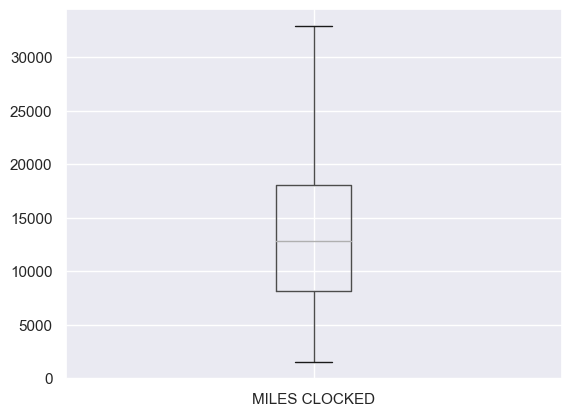

In [ ]:
df1.boxplot(column=['MILES CLOCKED'])

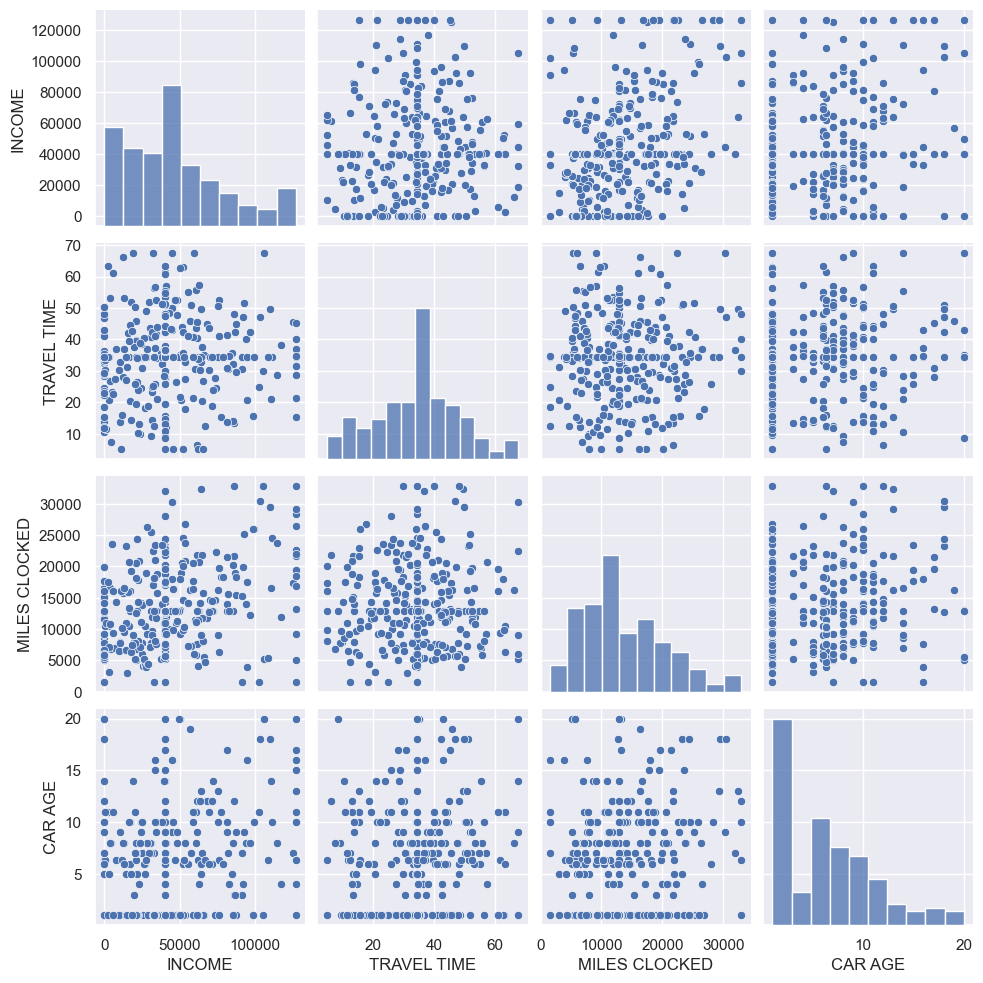

In [ ]:
sns.pairplot(df1)
plt.show()

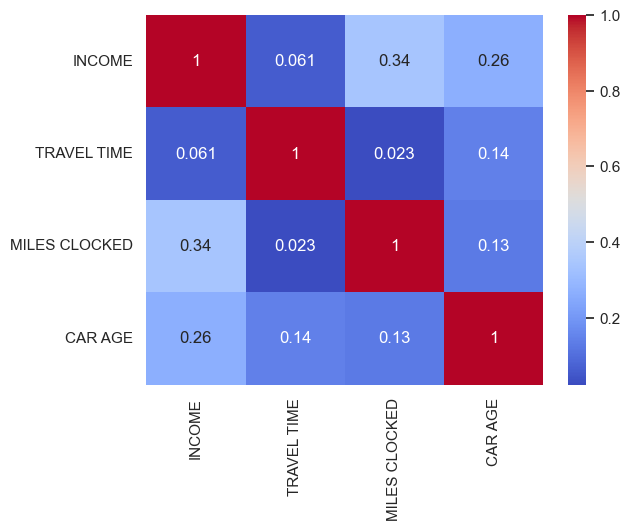

In [ ]:
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 302
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   INCOME          289 non-null    float64 
 1   MARITAL STATUS  289 non-null    object  
 2   SEX             289 non-null    object  
 3   EDUCATION       289 non-null    object  
 4   JOB             289 non-null    object  
 5   TRAVEL TIME     289 non-null    float64 
 6   USE             289 non-null    object  
 7   MILES CLOCKED   289 non-null    float64 
 8   CAR TYPE        289 non-null    object  
 9   CAR AGE         289 non-null    float64 
 10  CITY            289 non-null    object  
 11  POSTAL CODE     289 non-null    category
dtypes: category(1), float64(4), object(7)
memory usage: 27.8+ KB


# Encoding Part

In [ ]:
dummies = pd.get_dummies(df1[['MARITAL STATUS','SEX','EDUCATION','JOB','USE','CAR TYPE',
                             'CITY','POSTAL CODE']],
                        columns = ['MARITAL STATUS','SEX','EDUCATION','JOB','USE','CAR TYPE',
                             'CITY','POSTAL CODE'], 
                        prefix = ['MARITAL STATUS','SEX','EDUCATION','JOB','USE','CAR TYPE',
                             'CITY','POSTAL CODE'],
                        drop_first=True).head()

In [ ]:
dummies.head()

,MARITAL STATUS_Yes,SEX_M,EDUCATION_High School,EDUCATION_Masters,EDUCATION_PhD,JOB_Clerical,JOB_Doctor,JOB_Home Maker,JOB_Lawyer,JOB_Manager,...,POSTAL CODE_12180.0,POSTAL CODE_42420.0,POSTAL CODE_44123.0,POSTAL CODE_44412.0,POSTAL CODE_47150.0,POSTAL CODE_55106.0,POSTAL CODE_61701.0,POSTAL CODE_78207.0,POSTAL CODE_84057.0,POSTAL CODE_90049.0
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
dummies.columns

Index(['MARITAL STATUS_Yes', 'SEX_M', 'EDUCATION_High School',
       'EDUCATION_Masters', 'EDUCATION_PhD', 'JOB_Clerical', 'JOB_Doctor',
       'JOB_Home Maker', 'JOB_Lawyer', 'JOB_Manager', 'JOB_Professional',
       'JOB_Student', 'USE_Private', 'CAR TYPE_Panel Truck', 'CAR TYPE_Pickup',
       'CAR TYPE_SUV', 'CAR TYPE_Sports Car', 'CAR TYPE_Van', 'CITY_Houston',
       'CITY_Las Vegas', 'CITY_Los Angeles', 'CITY_New Albany',
       'CITY_New York City', 'CITY_Philadelphia', 'CITY_San Francisco',
       'CITY_Seattle', 'CITY_Texas', 'CITY_Washington', 'POSTAL CODE_12180.0',
       'POSTAL CODE_42420.0', 'POSTAL CODE_44123.0', 'POSTAL CODE_44412.0',
       'POSTAL CODE_47150.0', 'POSTAL CODE_55106.0', 'POSTAL CODE_61701.0',
       'POSTAL CODE_78207.0', 'POSTAL CODE_84057.0', 'POSTAL CODE_90049.0'],
      dtype='object')

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [ ]:
df1['INCOME'] = scaler.fit_transform(df1[['INCOME']])
df1['TRAVEL TIME'] = scaler.fit_transform(df1[['TRAVEL TIME']])
df1['MILES CLOCKED'] = scaler.fit_transform(df1[['MILES CLOCKED']])
df1['CAR AGE'] = scaler.fit_transform(df1[['CAR AGE']])

In [ ]:
df1.head()

,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,2.344391,No,F,Bachelors,Blue Collar,0.832200,Commercial,0.535034,Sports Car,0.132744,Texas,42420.0
1,0.139393,No,M,High School,Blue Collar,-0.991124,Private,0.754768,Minivan,-1.057530,Texas,42420.0
2,0.499435,No,F,Bachelors,Clerical,-0.043693,Private,-0.136620,SUV,-1.057530,Texas,42420.0
3,0.917492,No,F,High School,Lawyer,-1.366947,Private,0.662480,Sports Car,0.926260,Texas,42420.0
4,2.391357,No,M,High School,Blue Collar,0.013415,Commercial,2.133234,Panel Truck,0.727881,Texas,42420.0


In [ ]:
df.describe()

,INCOME,TRAVEL TIME,MILES CLOCKED,CAR AGE
count,246.000000,248.000000,264.000000,269.000000
mean,49229.059901,34.370438,13893.825758,6.330855
std,42207.456592,15.322125,7231.117284,5.234627
min,0.000000,5.000000,1500.000000,1.000000
25%,18499.955555,23.633340,7880.000000,1.000000
50%,40171.535635,34.426446,12845.000000,6.000000
75%,69429.320040,44.279590,18570.000000,10.000000
max,204667.589700,83.617643,38000.000000,20.000000


In [ ]:
df1.head(1)

,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,2.344391,No,F,Bachelors,Blue Collar,0.8322,Commercial,0.535034,Sports Car,0.132744,Texas,42420.0


In [ ]:
df1 = df1.drop(['MARITAL STATUS','SEX','EDUCATION','JOB','USE','CAR TYPE','CITY',
               'POSTAL CODE'], axis=1)

In [ ]:
df1.head(1)

,INCOME,TRAVEL TIME,MILES CLOCKED,CAR AGE
0,2.344391,0.8322,0.535034,0.132744


In [ ]:
dummies.head(1)

,MARITAL STATUS_Yes,SEX_M,EDUCATION_High School,EDUCATION_Masters,EDUCATION_PhD,JOB_Clerical,JOB_Doctor,JOB_Home Maker,JOB_Lawyer,JOB_Manager,...,POSTAL CODE_12180.0,POSTAL CODE_42420.0,POSTAL CODE_44123.0,POSTAL CODE_44412.0,POSTAL CODE_47150.0,POSTAL CODE_55106.0,POSTAL CODE_61701.0,POSTAL CODE_78207.0,POSTAL CODE_84057.0,POSTAL CODE_90049.0
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
final_df = pd.concat([df1, dummies], axis=1)

In [ ]:
final_df.head()

,INCOME,TRAVEL TIME,MILES CLOCKED,CAR AGE,MARITAL STATUS_Yes,SEX_M,EDUCATION_High School,EDUCATION_Masters,EDUCATION_PhD,JOB_Clerical,...,POSTAL CODE_12180.0,POSTAL CODE_42420.0,POSTAL CODE_44123.0,POSTAL CODE_44412.0,POSTAL CODE_47150.0,POSTAL CODE_55106.0,POSTAL CODE_61701.0,POSTAL CODE_78207.0,POSTAL CODE_84057.0,POSTAL CODE_90049.0
0,2.344391,0.832200,0.535034,0.132744,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.139393,-0.991124,0.754768,-1.057530,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.499435,-0.043693,-0.136620,-1.057530,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.917492,-1.366947,0.662480,0.926260,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.391357,0.013415,2.133234,0.727881,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# export the data 
final_df.to_csv("final_df.csv")